# Setting global seed

In [ ]:
import os
import tensorflow as tf
import numpy as np
import random

# Set a seed value
seed_value = 25

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)



# Importing the libraries

In [ ]:
# TODO: Import other necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the dataset

In [ ]:
# TODO: Populate the create_image_generators() function
def create_image_generators(train_dir, target_size=(150, 150), batch_size=20, val_split=0.2):
    """
    Create training and validation generators for image data.

    Parameters:
    - base_dir: Path to the base directory where the 'train' folder is located.
    - target_size: Tuple of integers, the dimensions to which all images found will be resized.
    - batch_size: Integer, size of the batches of data.
    - val_split: Float, the fraction of images reserved for validation.

    Returns:
    - train_generator: Training data generator.
    - validation_generator: Validation data generator.
    """

    # TODO: Creating Image Data Generator for both training and validation
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=val_split
    )
    print(datagen)
    # TODO: Create a training data generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        seed=seed_value
    )
    # TODO: Create a validation data generator
    validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',
        seed=seed_value
    )
    return train_generator, validation_generator

train_dir = './drive/MyDrive/Colab Notebooks/A3/train'
train_generator, validation_generator = create_image_generators(train_dir)

Found 148 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [ ]:
def print_generator_info(generator):
    """
    Print information about a data generator.

    Parameters:
    - generator: The data generator (train or validation).
    """
    # Number of images
    num_images = generator.samples
    # Batch size
    batch_size = generator.batch_size
    # Class indices
    class_indices = generator.class_indices
    # Number of classes
    num_classes = generator.num_classes
    # Filenames
    filenames = generator.filenames

    print(f"Number of images: {num_images}")
    print(f"Batch size: {batch_size}")
    print(f"Class indices: {class_indices}")
    print(f"Number of classes: {num_classes}")
    print(f"Number of filenames loaded: {len(filenames)}")  # Number of filenames might be large

# Example usage:
print("Training Generator Info:")
print_generator_info(train_generator)
print("\nValidation Generator Info:")
print_generator_info(validation_generator)


Training Generator Info:
Number of images: 148
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 148

Validation Generator Info:
Number of images: 36
Batch size: 20
Class indices: {'not_polar': 0, 'polar': 1}
Number of classes: 2
Number of filenames loaded: 36


# Define the CNN model

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dropout_1 (Dropout)         (None, 82944)             0

In [ ]:
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

Total number of parameters: 42487745


# Compile and fit the CNN model

In [15]:
# TODO: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# TODO: Fit the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=1
)


Epoch 1/20
8/8 [==============================] - 36s 4s/step - loss: 0.8330 - accuracy: 0.5000 - val_loss: 0.6364 - val_accuracy: 0.5278
Epoch 2/20
8/8 [==============================] - 24s 3s/step - loss: 0.5940 - accuracy: 0.6622 - val_loss: 0.4530 - val_accuracy: 0.8611
Epoch 3/20
8/8 [==============================] - 26s 3s/step - loss: 0.4380 - accuracy: 0.8446 - val_loss: 0.3329 - val_accuracy: 0.8889
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.3425 - accuracy: 0.8851 - val_loss: 0.3203 - val_accuracy: 0.8611
Epoch 5/20
8/8 [==============================] - 18s 2s/step - loss: 0.3599 - accuracy: 0.8378 - val_loss: 0.2504 - val_accuracy: 0.9167
Epoch 6/20
8/8 [==============================] - 14s 2s/step - loss: 0.3338 - accuracy: 0.8446 - val_loss: 0.1926 - val_accuracy: 0.9167
Epoch 7/20
8/8 [==============================] - 14s 2s/step - loss: 0.3275 - accuracy: 0.8514 - val_loss: 0.2664 - val_accuracy: 0.8889
Epoch 8/20
8/8 [==================

# Plot Training and Validation accuracies

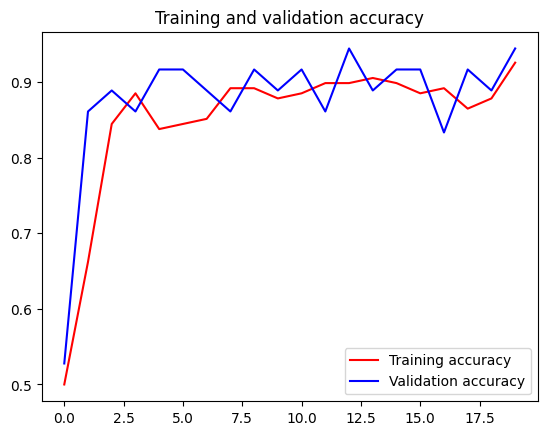

<Figure size 1200x500 with 0 Axes>

In [17]:
# TODO: Plot training & validation accuracy values
import matplotlib.pyplot as plt

def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure(figsize=(12, 5))
    plt.show()

plot_accuracy(history)

# Plot Training and Validation losses

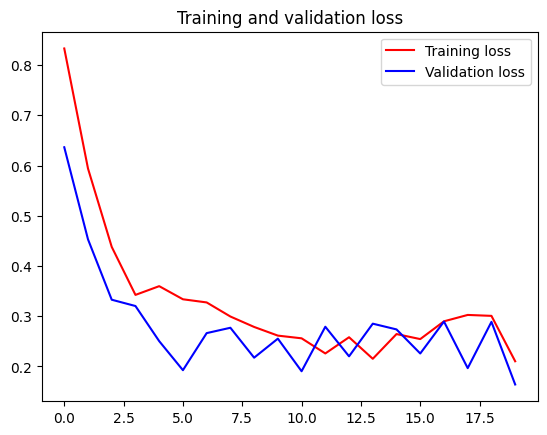

<Figure size 1200x500 with 0 Axes>

In [19]:
# TODO: Plot training & validation accuracy losses
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure(figsize=(12, 5))
    plt.show()

plot_loss(history)

# Testing


In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_display_predict_image(img_path, model, size=(150, 150)):
    """
    Load, preprocess, display, and predict the class of an image using a given model.

    Parameters:
    - img_path: String, path to the image file.
    - model: TensorFlow/Keras model that will be used to predict the image.
    - size: Tuple of integers, target size of the image (height, width).
    """
    # Load an image file to PIL format, target size can be adjusted
    # TODO
    image = Image.open(img_path).resize(size)

    # Convert the PIL image to a numpy array
    # TODO
    img = np.array(image)

    # Add a dimension to transform the array into a batch shape
    # TODO
    img = np.expand_dims(img, axis=0)

    # Normalize the image pixels to [0, 1]
    # TODO
    img = img / 255.0

    # Display the image
    # TODO
    plt.imshow(img[0])
    plt.show()

    # Predict using the provided model
    # TODO
    prediction = model.predict(img)

    print(prediction)
    print("Polar Bear" if prediction[0][0] > 0.5 else "Not Polar Bear")

## Inference for test_1.jpg

In [27]:
image_base_dir = './drive/MyDrive/Colab Notebooks/A3/test/'

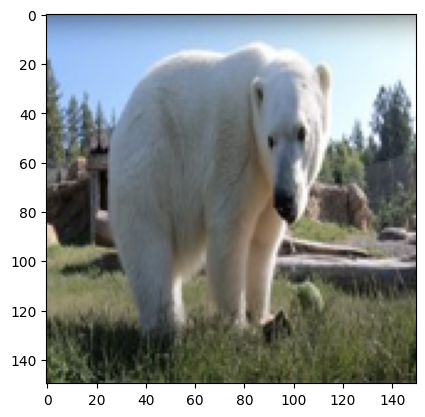

1/1 [==============================] - 0s 104ms/step
[[0.14018036]]
Not Polar Bear


In [29]:
img_path = image_base_dir + 'test_1.jpg'
load_display_predict_image(img_path, model)

## Inference for test_2.jpg

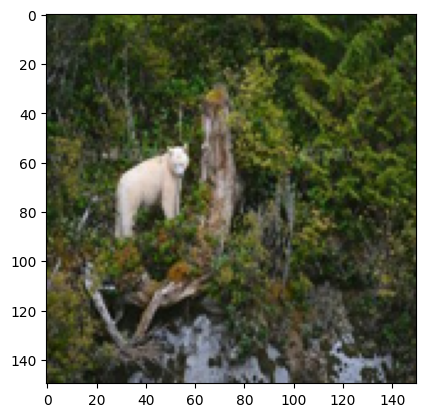

1/1 [==============================] - 0s 185ms/step
[[0.01371099]]
Not Polar Bear


In [30]:
img_path =  image_base_dir + 'test_2.jpg'
load_display_predict_image(img_path, model)

## Inference for test_3.jpg

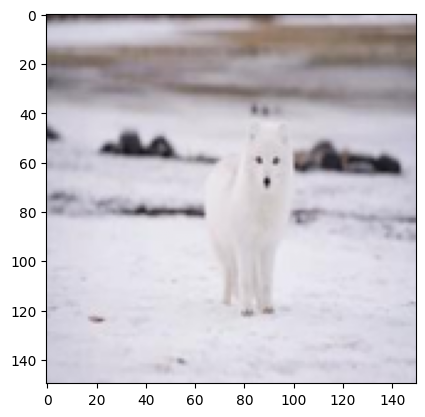

1/1 [==============================] - 0s 145ms/step
[[0.9899323]]
Polar Bear


In [31]:
img_path = image_base_dir + 'test_3.jpg'
load_display_predict_image(img_path, model)

## Inference for test_4.jpg

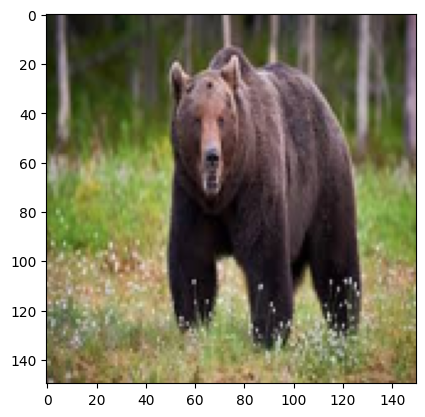

1/1 [==============================] - 0s 128ms/step
[[0.01684919]]
Not Polar Bear


In [32]:
img_path = image_base_dir + 'test_4.jpg'
load_display_predict_image(img_path, model)

## Inference for test_5.jpg

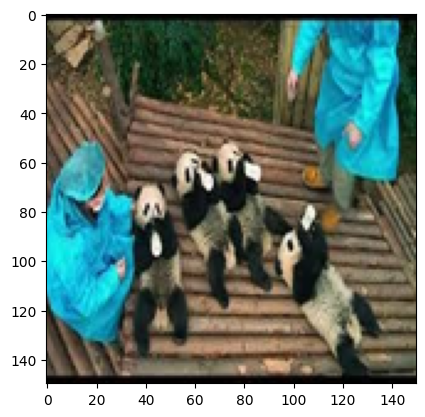

1/1 [==============================] - 0s 49ms/step
[[0.00678297]]
Not Polar Bear


In [33]:
img_path = image_base_dir + 'test_5.jpg'
load_display_predict_image(img_path, model)

## Inference for test_6.jpg

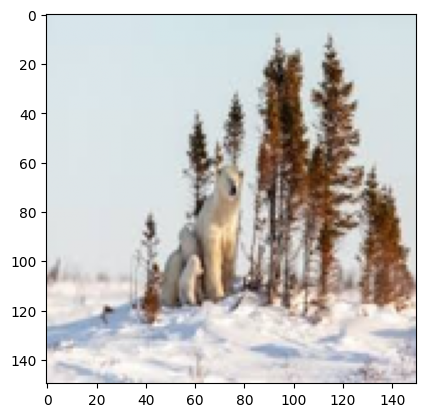

1/1 [==============================] - 0s 125ms/step
[[0.4095488]]
Not Polar Bear


In [34]:
img_path = image_base_dir + 'test_6.jpg'
load_display_predict_image(img_path, model)

# Visualize layer activations

In [45]:
# import tensorflow.image as image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess an image
def load_image(img_path, size=(150,150)):
    img = image.load_img(img_path, target_size=size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    return img_tensor

# Define a function to display the activations
def display_layer_activations(activations, model):
    layer_names = [layer.name for layer in model.layers[:4]]
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image = np.maximum(channel_image, 0) / max(channel_image.std(), 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.savefig(image_base_dir + 'Layer Activation Result.png')
        plt.show()

1/1 [==============================] - 0s 81ms/step


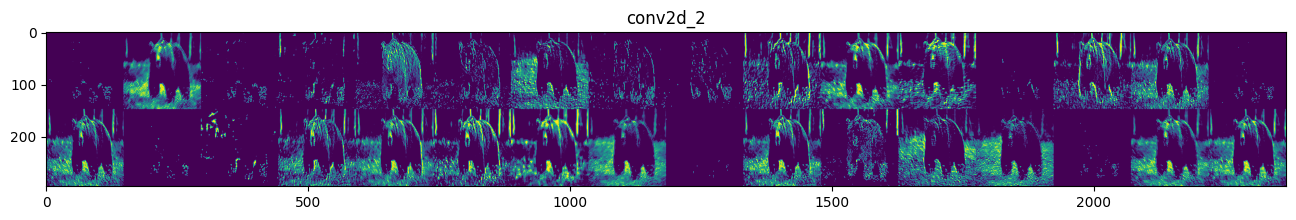

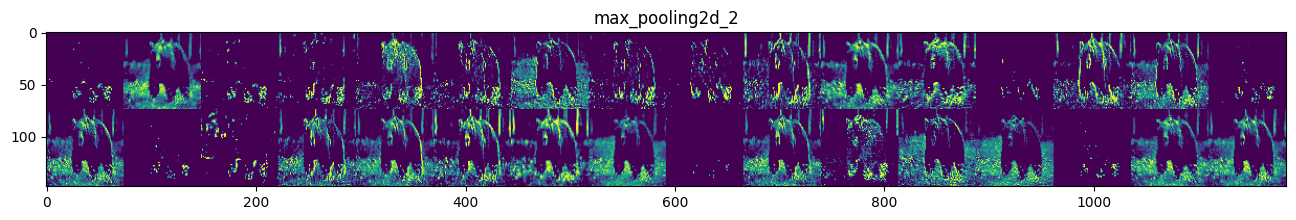

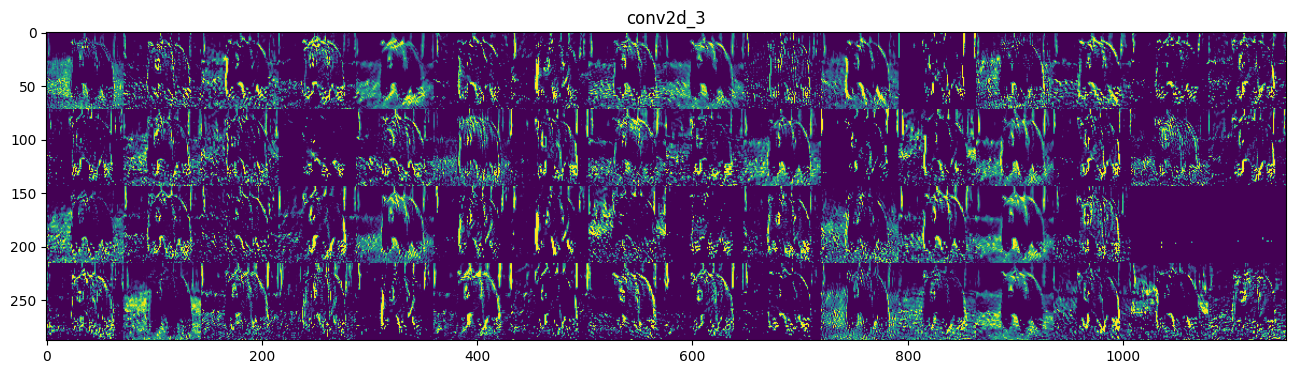

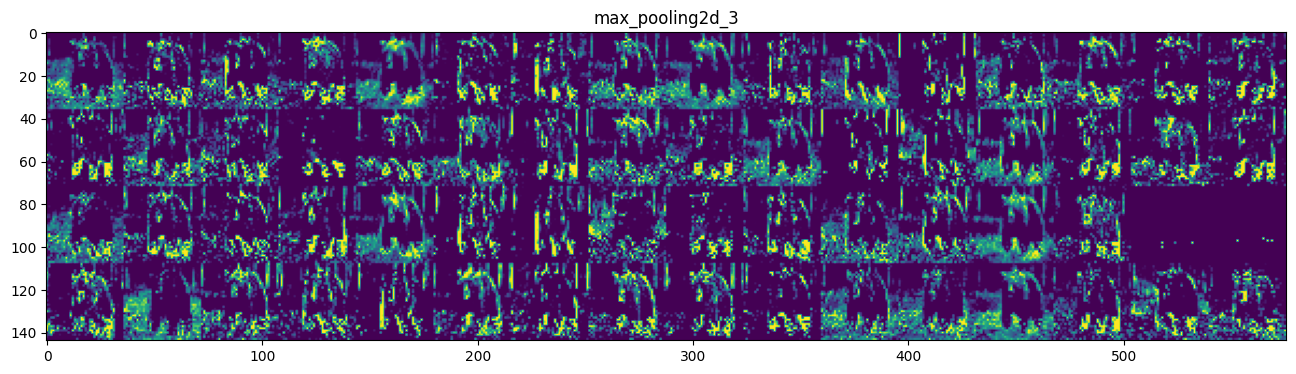

In [46]:
# TODO: Define a function to create a model that returns output from each layer
def get_layer_outputs(model, img_tensor):
    # Extracts outputs for all layers up to the last MaxPooling layer (index 3)
    layer_outputs = [layer.output for layer in model.layers[:4]]
    # Creates a new model that will return these outputs, given the model input
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
    # Returns a list of numpy arrays, one array per layer activation
    activations = activation_model.predict(img_tensor)
    return activations


# Load and preprocess an image
img_path = image_base_dir + 'test_4.jpg'
new_image = load_image(img_path)

# Get activations and display them
activations = get_layer_outputs(model, new_image)
display_layer_activations(activations, model)